<div style="text-align:center;">
    <span style="color:purple; font-size:30px; font-weight:bold;">Predicting Cerebrovascular Accident (CVA) by Using Machine Learning </span>
</div>

<span style="color:blue; font-size:24px; font-weight:bold;">Importing Libraries</span>

In [86]:
# Standard library imports
from datetime import datetime
import os

# Third-party library imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


<span style="color:blue; font-size:24px; font-weight:bold;">Brief Look at the Data</span>

In [87]:
# Reading the data
df = pd.read_csv('C:\\Users\\mailt\\OneDrive\\Desktop\\PROJECT\\StrokePrediction\\healthcare-dataset-stroke-data.csv')

In [88]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [89]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [90]:
# The number of rows and columns
num_rows = df.shape[0]
num_cols = df.shape[1]
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_cols}')

Number of rows: 5110
Number of columns: 12


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<Figure size 1000x600 with 0 Axes>

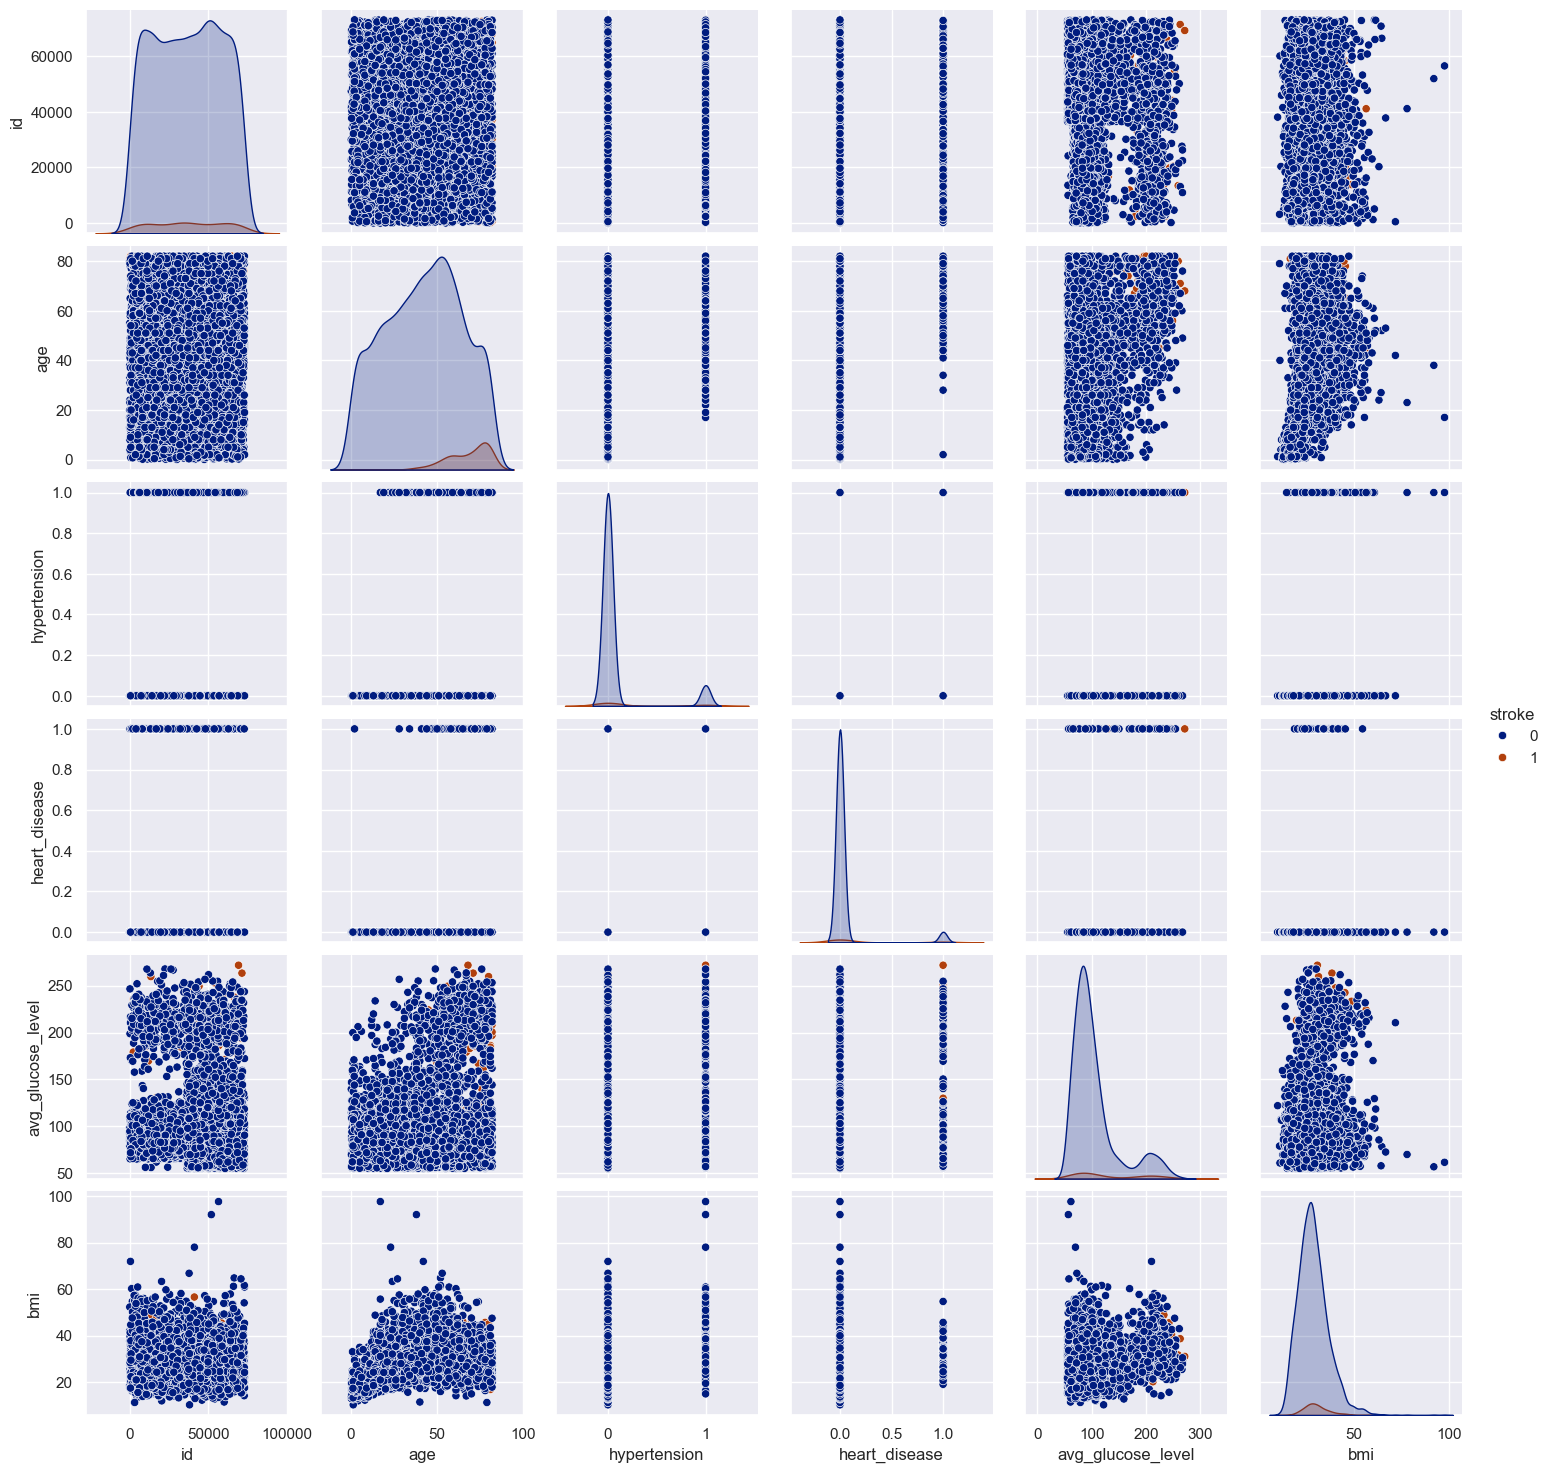

In [92]:
plt.figure(figsize=(10,6))
sns.pairplot(df,hue='stroke',palette='dark')

<span style="color:blue; font-size:24px; font-weight:bold;">Data Preprocessing</span>

<span style="color:blue; font-size:18px; font-weight:bold;">Missing data</span>

In [93]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [94]:
# Imputing missing values using KNN
imputer = KNNImputer(n_neighbors=5, weights='uniform')
df['bmi'] = imputer.fit_transform(df[['bmi']])

In [95]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<span style="color:blue; font-size:18px; font-weight:bold;">Removing Outliers</span>

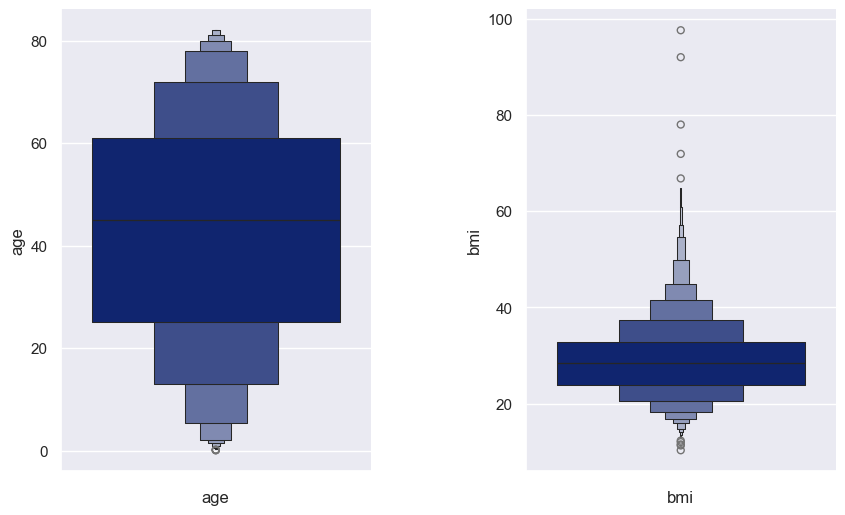

In [96]:
# Setting seaborn style palette
sns.set_theme(style="darkgrid", palette="dark")

# Array of columns that we would like to plot
cols = ['age','bmi']

# Instantiating figure and axes for as many subplots as the columns in question
fig, ax = plt.subplots(ncols=len(cols), figsize=(5 * len(cols),6), sharex = True)

# Drawing a Boxen Plot for each column in question
for i in range(len(cols)):
  (sns.boxenplot(y=df[cols[i]],data=df, showfliers=True,ax=ax[i])).set(xlabel=cols[i])

# Adjusting space between subplots
fig.subplots_adjust(wspace=0.5)
sns.despine()

In [97]:
# Displaying rows with 'bmi' > 80
display(df[df['bmi'] > 80])

# Droping rows
df.drop(df.index[df['bmi'] > 80], inplace=True)

# Reseting index of dataframe
df = df.reset_index(drop = True)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


<span style="color:blue; font-size:18px; font-weight:bold;">Checking Class Imbalance</span>

In [98]:
stroke_count = df['stroke'].value_counts()

In [99]:
stroke_count

stroke
0    4859
1     249
Name: count, dtype: int64

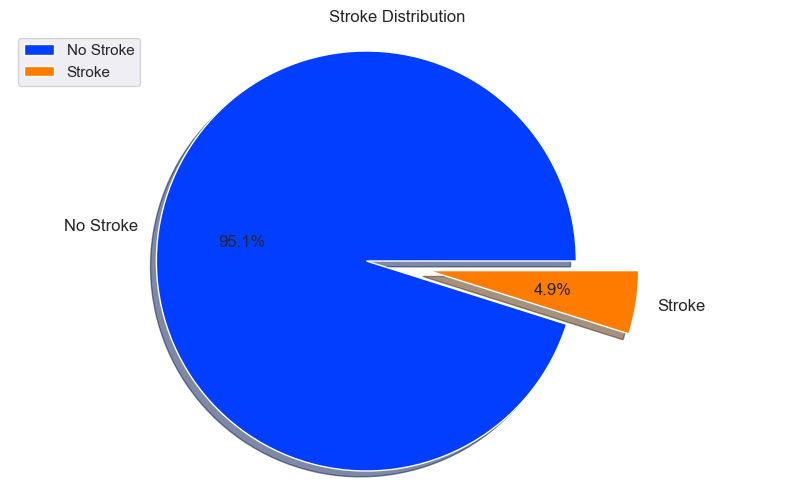

In [100]:
plt.figure(figsize=(10, 6))
plt.pie(stroke_count, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%',
        colors=sns.color_palette('bright', 2), explode=(0.2, 0.1), shadow=True,
        textprops={'fontsize': 12})
plt.title('Stroke Distribution')
plt.legend(loc='upper left')
plt.axis('equal')
plt.show()

<span style="color:blue; font-size:18px; font-weight:bold;">Cleaning the Data</span>

In [101]:
df.duplicated().any()

False

In [102]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
categorical

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

<span style="color:blue; font-size:18px; font-weight:bold;">Feature Engineering</span>

In [103]:
# Dropping column 'id'
df.drop('id', axis=1, inplace = True)

# Reseting index of dataframe
df = df.reset_index(drop = True)

<span style="color:blue; font-size:18px; font-weight:bold;">Data Transformation</span>

In [104]:
# Function for printing unique value counts in columns of a dataframe
def unique_col_counts(df, columns):
  for i in range(len(columns)):
    print(df[columns[i]].value_counts(),"\n")

# Displaying unique value counts in columns
columns = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']
unique_col_counts(df, columns)

gender
Female    2994
Male      2113
Other        1
Name: count, dtype: int64 

hypertension
0    4612
1     496
Name: count, dtype: int64 

heart_disease
0    4832
1     276
Name: count, dtype: int64 

ever_married
Yes    3352
No     1756
Name: count, dtype: int64 

work_type
Private          2923
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64 

Residence_type
Urban    2596
Rural    2512
Name: count, dtype: int64 

smoking_status
never smoked       1891
Unknown            1543
formerly smoked     885
smokes              789
Name: count, dtype: int64 

stroke
0    4859
1     249
Name: count, dtype: int64 



In [105]:
# Displaying row with 'gender' as 'Other'
display(df[df['gender'] == 'Other'])

# Dropping the row
df.drop(df.index[df['gender'] == 'Other'], inplace=True)

# Reseting index of dataframe
df = df.reset_index(drop = True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3115,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [106]:
gender_counts = df['gender'].value_counts()
print(gender_counts)

gender
Female    2994
Male      2113
Name: count, dtype: int64


In [107]:
# Declaring old vs new values for 'work_type'
new_work_type ={'Private' : 'Work',
                 'Self-employed' : 'Work',
                 'children': 'No Work',
                 'Govt_job' : 'Work',
                 'Never_worked' : 'No Work'
                }
# Replacing old values with new
df['work_type'].replace(new_work_type, inplace = True)

# Declaring old vs new values for 'smoking_status'
new_smoking_status ={'smokes' : 'Yes',
                      'never smoked' : 'No',
                      'Unknown' : 'No',
                      'formerly smoked': 'No'
                     }
# Replacing old values with new
df['smoking_status'].replace(new_smoking_status, inplace = True)

# Checking the newly assigned values and counts
columns = ['work_type','smoking_status']
unique_col_counts(df, columns)

work_type
Work       4398
No Work     709
Name: count, dtype: int64 

smoking_status
No     4318
Yes     789
Name: count, dtype: int64 



In [108]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Work,Urban,228.69,36.600000,No,1
1,Female,61.0,0,0,Yes,Work,Rural,202.21,28.893237,No,1
2,Male,80.0,0,1,Yes,Work,Rural,105.92,32.500000,No,1
3,Female,49.0,0,0,Yes,Work,Urban,171.23,34.400000,Yes,1
4,Female,79.0,1,0,Yes,Work,Rural,174.12,24.000000,No,1


<span style="color:blue; font-size:24px; font-weight:bold;">One-Hot-Encoding</span>

In [109]:
# Categorical Columns: 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'

# Initializing One Hot Encoder
one_hot_encoder = OneHotEncoder()
# Fit and Transform the columns
df_temp = one_hot_encoder.fit_transform(df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]).toarray()

# Getting newly encoded columns and concatting them to the Dataframe
encodings = pd.DataFrame(columns = one_hot_encoder.get_feature_names_out(),data = df_temp)
encodings = encodings.astype(int)
df = pd.concat([df,encodings] , axis=1)

# Dropping original columns from the dataset after encoding is done
df.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'],axis = 1, inplace=True)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_No Work,work_type_Work,Residence_type_Rural,Residence_type_Urban,smoking_status_No,smoking_status_Yes
0,67.0,0,1,228.69,36.600000,1,0,1,0,1,0,1,0,1,1,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,1,0,1,1,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,1,0,1,1,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,1,0,1,0,1,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,1,0,1,1,0,1,0


<span style="color:blue; font-size:24px; font-weight:bold;">Exploratory Data Analysis</span>

In [110]:
# Numeric data distribution
plt.figure(figsize=(20, 12))

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

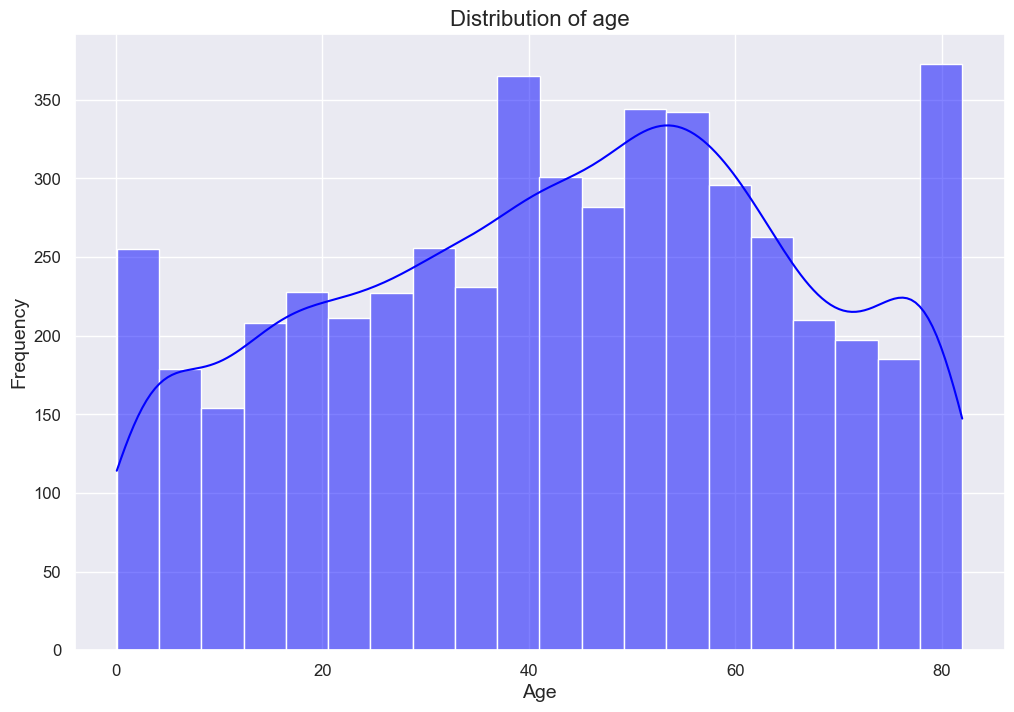

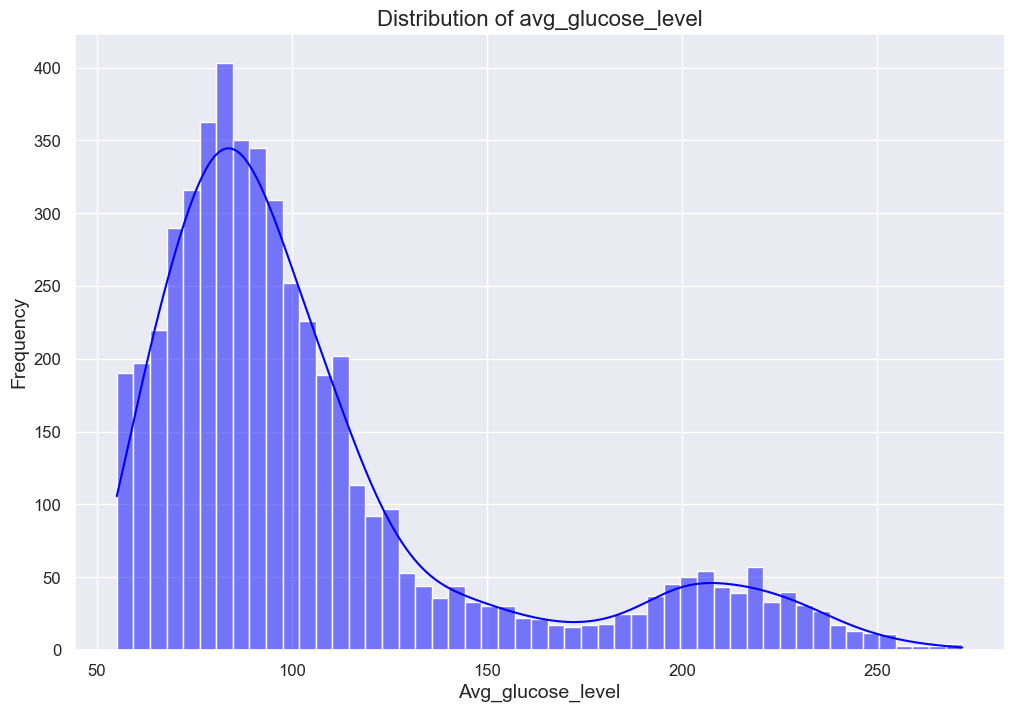

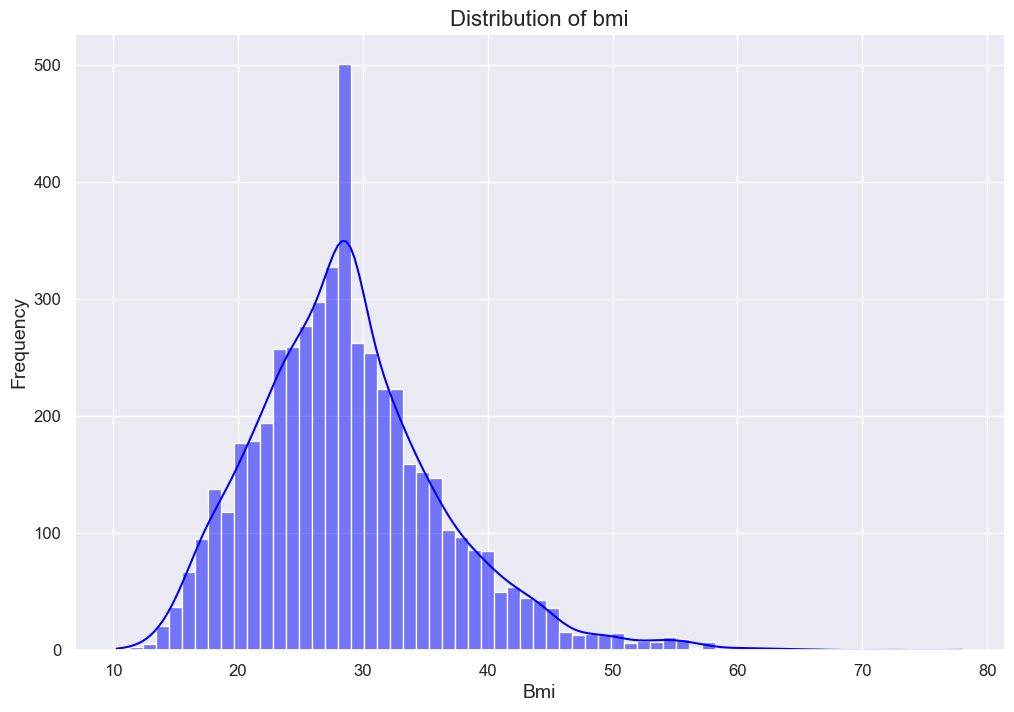

In [111]:
for i, col in enumerate(['age', 'avg_glucose_level', 'bmi'], start=1):
    plt.figure(figsize=(12, 8))  # Individual plot size
    sns.histplot(data=df, x=col, kde=True, color='blue')
    plt.title(f'Distribution of {col}', fontsize=16)  # Increase title fontsize
    plt.xlabel(col.capitalize(), fontsize=14)  # Increase x-axis label fontsize
    plt.ylabel('Frequency', fontsize=14)  # Increase y-axis label fontsize
    plt.xticks(fontsize=12)  # Increase x-axis ticks fontsize
    plt.yticks(fontsize=12)  # Increase y-axis ticks fontsize
    plt.show()

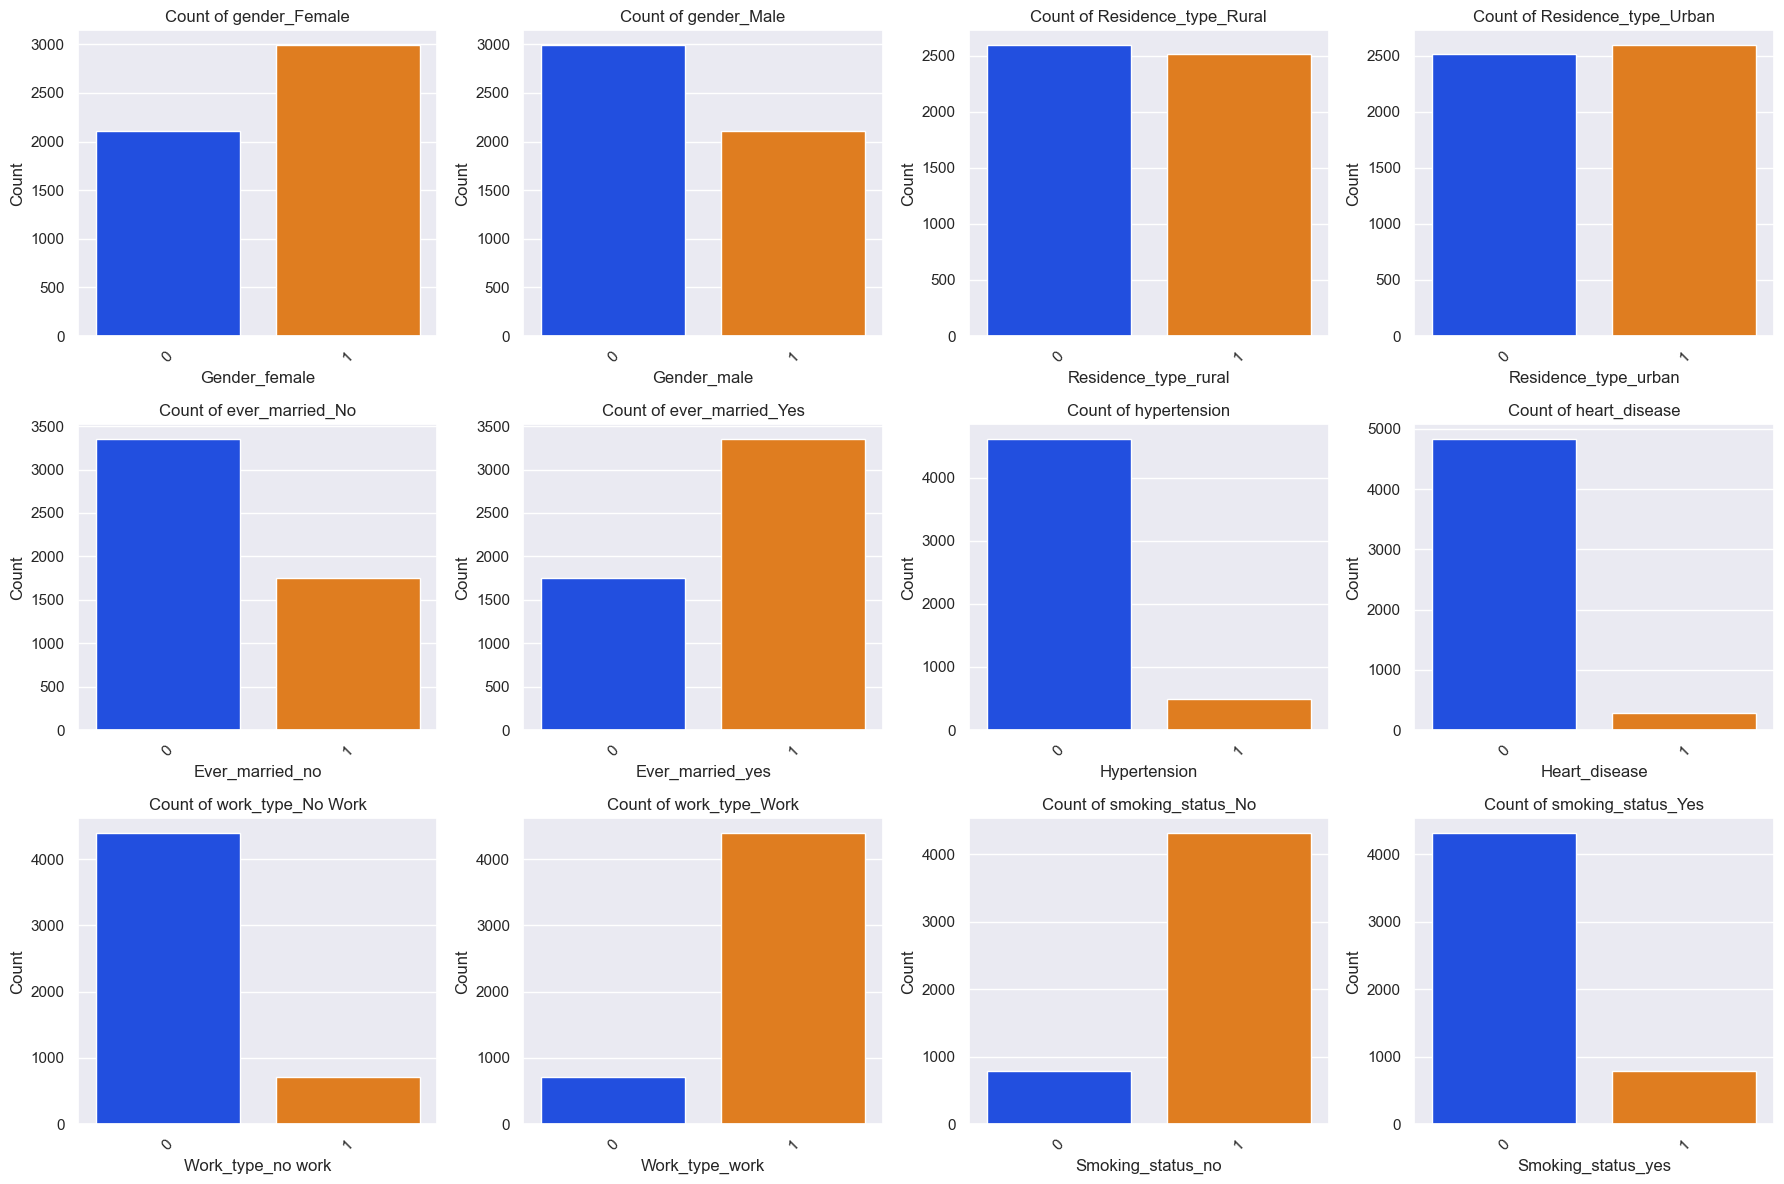

In [112]:
# Count of categorical features
plt.figure(figsize=(18, 12))  
for i, col in enumerate(['gender_Female', 'gender_Male', 'Residence_type_Rural', 'Residence_type_Urban', 'ever_married_No', 'ever_married_Yes', 'hypertension', 'heart_disease', 'work_type_No Work','work_type_Work', 'smoking_status_No', 'smoking_status_Yes'], start=1):
    plt.subplot(3, 4, i)  
    sns.countplot(data=df, x=col, palette='bright')
    plt.title(f'Count of {col}')
    plt.xlabel(col.capitalize()) 
    plt.ylabel('Count')  
    plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

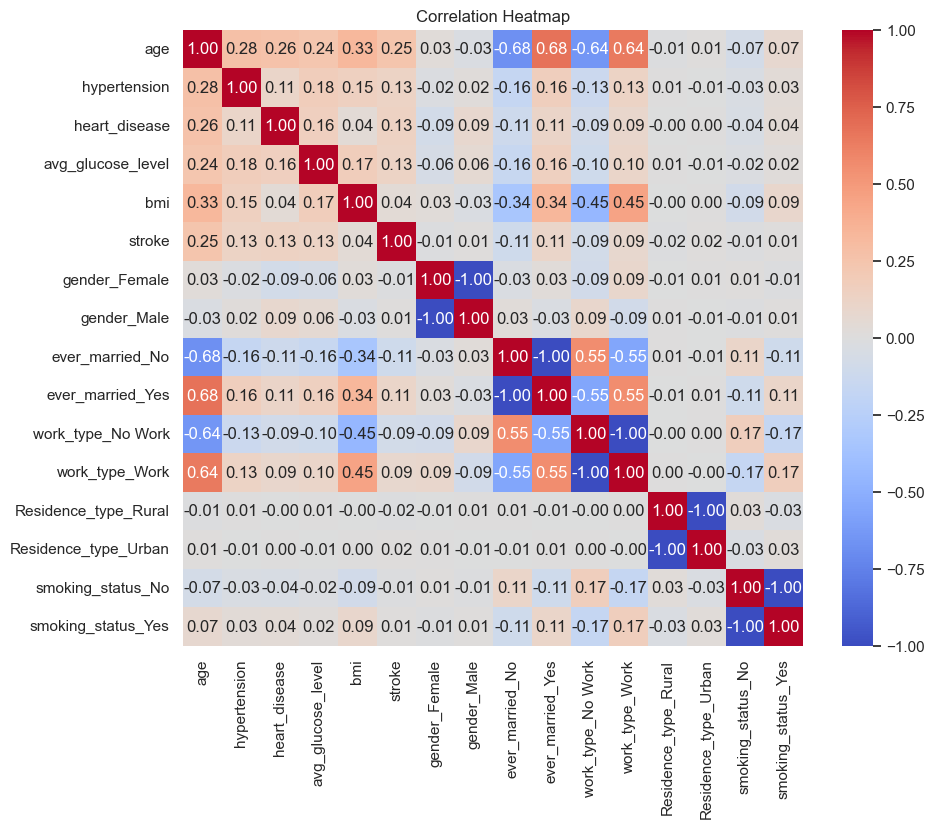

In [113]:
# Correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

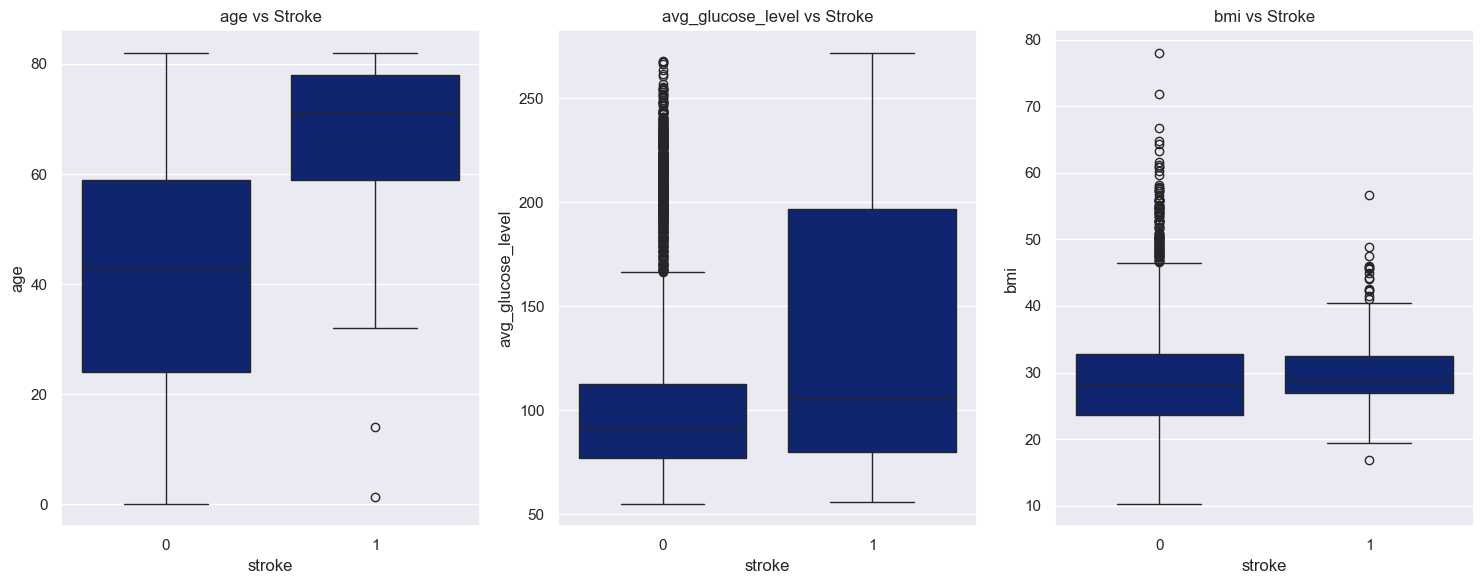

In [114]:
# Boxplot for numerical features vs. target variable
plt.figure(figsize=(15, 6))

for i, col in enumerate(['age', 'avg_glucose_level', 'bmi']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, x='stroke', y=col)
    plt.title(f'{col} vs Stroke')

plt.tight_layout()
plt.show()

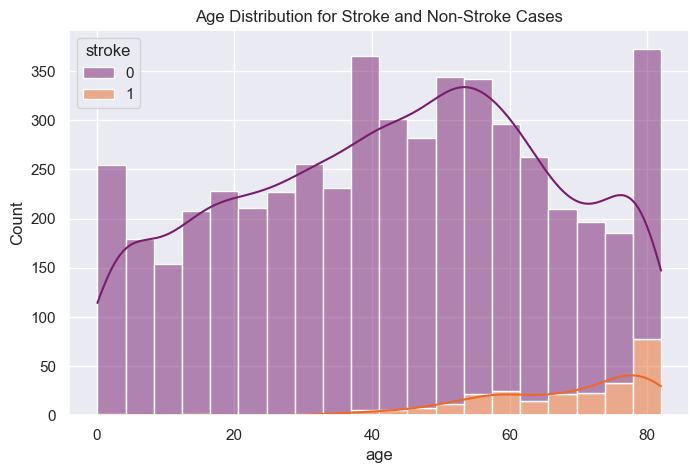

In [115]:
# Age distribution among stroke and non-stroke cases
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', hue='stroke', multiple='stack', kde=True, palette='inferno')
plt.title('Age Distribution for Stroke and Non-Stroke Cases')
plt.show()


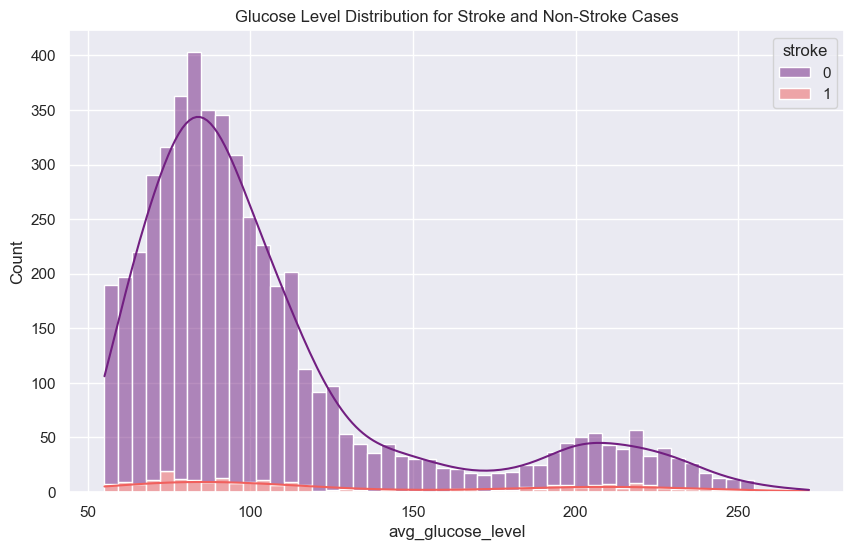

In [116]:
# Glucose level distribution among stroke and non-stroke cases
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='avg_glucose_level', hue='stroke', multiple='stack', kde=True, palette='magma')
plt.title('Glucose Level Distribution for Stroke and Non-Stroke Cases')
plt.show()

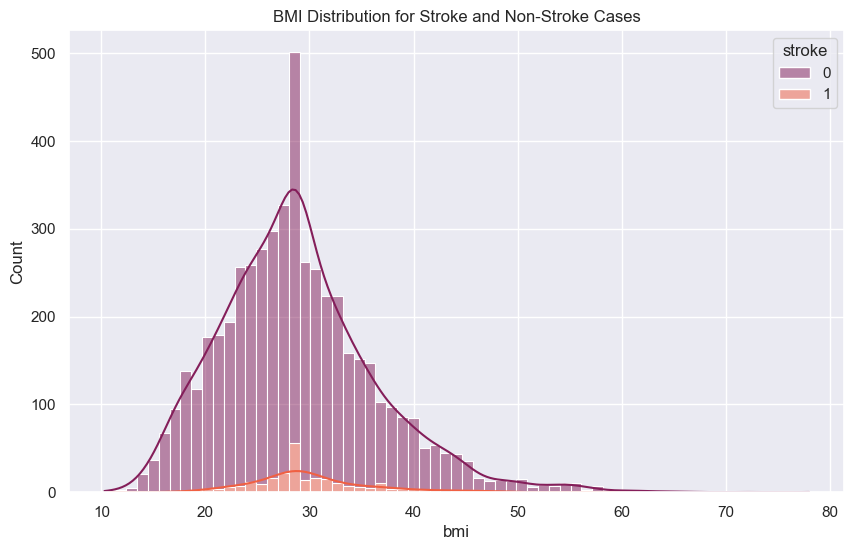

In [117]:
# BMI distribution among stroke and non-stroke cases
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', hue='stroke', multiple='stack', kde=True, palette='rocket')
plt.title('BMI Distribution for Stroke and Non-Stroke Cases')
plt.show()

<span style="color:blue; font-size:24px; font-weight:bold;">Removing Skewness</span>

In [118]:
# Measuring skewness of the features
skewness = df[['avg_glucose_level', 'age', 'bmi']].apply(lambda x: skew(x))
print("Skewness before transformation:")
print(skewness)

Skewness before transformation:
avg_glucose_level    1.572259
age                 -0.137929
bmi                  0.876241
dtype: float64


In [119]:
# Applying Box-Cox transformation
df['avg_glucose_level'], _ = boxcox(df['avg_glucose_level'] + 1)  # Adding 1 to avoid zero values
df['bmi'], _ = boxcox(df['bmi'] + 1)

# Check skewness after transformation
skewness_after = df[['avg_glucose_level', 'bmi']].skew()
print("Skewness after Box-Cox transformation:")
print(skewness_after)

Skewness after Box-Cox transformation:
avg_glucose_level    0.084599
bmi                  0.000480
dtype: float64


<span style="color:blue; font-size:24px; font-weight:bold;">Splitting Data into Features & Label</span>

In [120]:
# Splitting data into features and target
X_temp = df.drop('stroke', axis=1)
y_temp = df['stroke']
X_temp.shape, y_temp.shape

((5107, 15), (5107,))

<span style="color:blue; font-size:24px; font-weight:bold;">Scaling the Features</span>

In [121]:
# Instantiating Stander Scaler and fit and tranform feature variable set X
scaler = StandardScaler()
X_temp = pd.DataFrame(scaler.fit_transform(X_temp), columns=X_temp.columns)

X_temp.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_No Work,work_type_Work,Residence_type_Rural,Residence_type_Urban,smoking_status_No,smoking_status_Yes
0,1.050908,-0.327977,4.183733,1.862263,1.047660,-1.190354,1.190354,-0.72358,0.72358,-0.401509,0.401509,-0.983492,0.983492,0.427462,-0.427462
1,0.785570,-0.327977,-0.239021,1.700393,0.124897,0.840086,-0.840086,-0.72358,0.72358,-0.401509,0.401509,1.016785,-1.016785,0.427462,-0.427462
2,1.625806,-0.327977,4.183733,0.394613,0.582503,-1.190354,1.190354,-0.72358,0.72358,-0.401509,0.401509,1.016785,-1.016785,0.427462,-0.427462
3,0.254895,-0.327977,-0.239021,1.444992,0.804587,0.840086,-0.840086,-0.72358,0.72358,-0.401509,0.401509,-0.983492,0.983492,-2.339391,2.339391
4,1.581583,3.048995,-0.239021,1.472793,-0.590547,0.840086,-0.840086,-0.72358,0.72358,-0.401509,0.401509,1.016785,-1.016785,0.427462,-0.427462


<span style="color:blue; font-size:24px; font-weight:bold;">Balancing the Target</span>

In [122]:
# Resample data using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_temp, y_temp)
print(X_resampled.shape,y_resampled.shape)

(9716, 15) (9716,)


In [123]:
value_counts_resampled = pd.Series(y_resampled).value_counts()
print(value_counts_resampled)

stroke
1    4858
0    4858
Name: count, dtype: int64


<span style="color:blue; font-size:24px; font-weight:bold;">Reducing Dimensionality Using PCA</span>

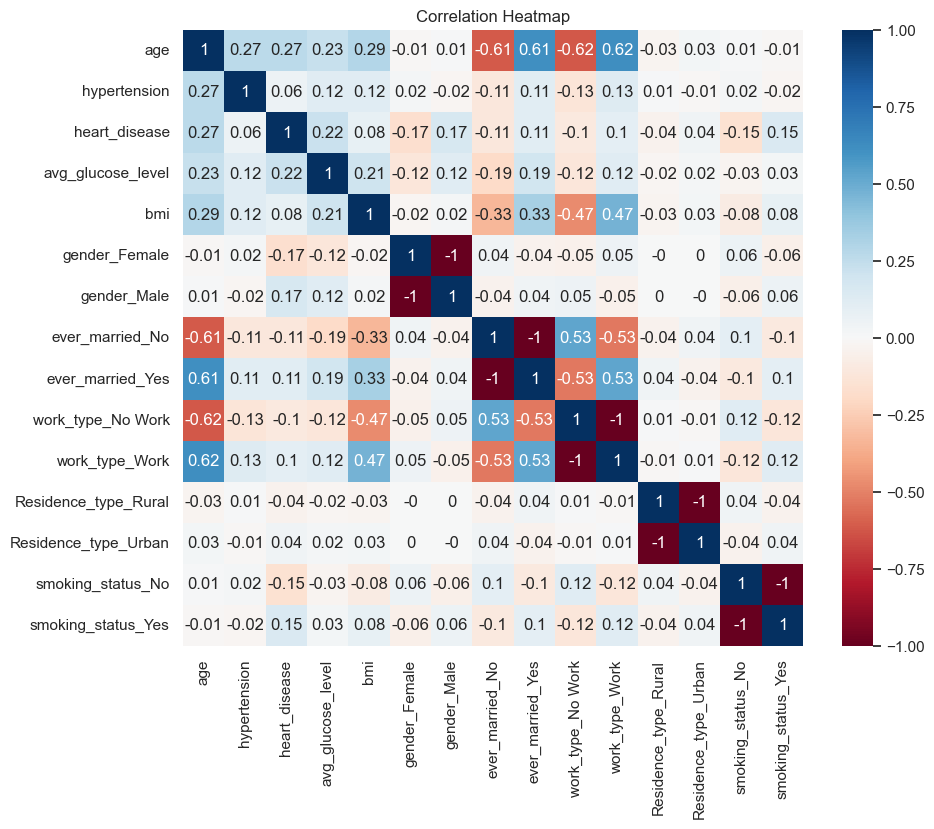

In [124]:
# Ploting Seaborn Heatmap to identify correlated features
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figure size
sns.heatmap(X_resampled.corr().round(2), annot=True, cmap="RdBu", ax=ax)  
plt.title('Correlation Heatmap')
plt.show()

In [125]:
# Applying PCA with 95% variance being retained
pca = PCA(n_components = 0.95)
pca.fit(X_resampled)
X = pd.DataFrame(pca.transform(X_resampled))
y=y_resampled
X.head(5)

,0,1,2,3,4,5,6,7
0,-3.069586,2.438068,-0.456020,-2.229073,1.069798,-1.490146,-0.555262,0.315573
1,-0.129384,-1.618963,-0.910968,0.673376,0.363179,-0.890052,-1.585051,-0.258460
2,-2.728017,1.760419,-2.523043,-0.433995,1.454246,-1.625544,0.872307,0.215699
3,-1.101602,0.390048,3.018629,1.952240,-0.457170,0.117163,-1.625592,-0.139780
4,-0.969386,-2.455717,-1.190673,0.054088,1.138682,2.074422,-0.766391,-0.838889


In [126]:
# Getting the indices of the features kept after PCA
kept_feature_indices = pca.explained_variance_ratio_

# Creating a list of the indices of the kept features
kept_features_indices = [i for i, ratio in enumerate(kept_feature_indices)]

# Getting the column names of the original DataFrame
original_column_names = X_temp.columns

# Creating a list of the names of the kept features
kept_features = [original_column_names[i] for i in kept_features_indices]

# Creating a list of the indices of the dropped features
dropped_features_indices = [i for i in range(X_resampled.shape[1]) if i not in kept_features_indices]

# Creating a list of the names of the dropped features
dropped_features = [original_column_names[i] for i in dropped_features_indices]

print("Features Kept after PCA: ", kept_features)
print("Features Dropped after PCA: ", dropped_features)

Features Kept after PCA:  ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male', 'ever_married_No']
Features Dropped after PCA:  ['ever_married_Yes', 'work_type_No Work', 'work_type_Work', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_No', 'smoking_status_Yes']


<span style="color:blue; font-size:24px; font-weight:bold;">Confusion Matrix</span>

In [127]:
# Function to plot Confusion matrix
def plot_confusion_matrix(y_test, y_prediction):
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="plasma")
    ax.set_xlabel('Prediced labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(["Didn't Have Stroke", "Had Stroke"])
    ax.yaxis.set_ticklabels(["Didn't Have Stroke", "Had Stroke"]) 
    plt.show()

<span style="color:blue; font-size:24px; font-weight:bold;">Splitting into Train & Test Dataset</span>

In [128]:
# Splitting X, y to train & test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

<span style="color:blue; font-size:24px; font-weight:bold;">Modeling</span>

<span style="color:blue; font-size:18px; font-weight:bold;">Random Forest Classifier</span>

In [129]:
# Parameters to test in algorithm
parameters = {
    'n_estimators' : [50, 100, 250, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']
}

In [130]:
rf = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(estimator=rf, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', rf_cv.best_params_)
print('accuracy : ', rf_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 250}
accuracy :  0.917911650173861


In [131]:
# Time before running algorithm
t1 = datetime.now()
# Model :
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)
# Time after running algorithm
t2 = datetime.now()

In [132]:
y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print('RandomForestClassifier score : ', rf_score)

RandomForestClassifier score :  0.924


In [133]:
delta = t2-t1
delta_rf = round(delta.total_seconds(), 3)
print('RandomForestClassifier takes : ', delta_rf, 'Seconds')

RandomForestClassifier takes :  17.458 Seconds


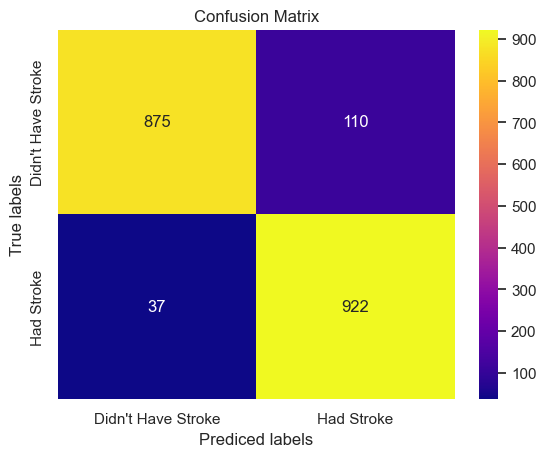

In [134]:
plot_confusion_matrix(y_test, y_pred_rf)

In [135]:
cr = metrics.classification_report(y_test, y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       985
           1       0.89      0.96      0.93       959

    accuracy                           0.92      1944
   macro avg       0.93      0.92      0.92      1944
weighted avg       0.93      0.92      0.92      1944



<span style="color:blue; font-size:18px; font-weight:bold;">Logistic Regression</span>

In [136]:
# Parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters : ', lr_cv.best_params_)
print('accuracy : ', lr_cv.best_score_)

Tuned hyper parameters :  {'C': 0.001, 'class_weight': 'balanced', 'solver': 'liblinear'}
accuracy :  0.7371314759489567


In [137]:
# Time before running algorithm
t1 = datetime.now()
# Model
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)
# Time after running algorithm
t2 = datetime.now()

In [138]:
y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print('LogisticRegression score : ', lr_score)

LogisticRegression score :  0.73


In [139]:
delta = t2-t1
delta_lr = round(delta.total_seconds(), 3)
print('LogisticRegression takes : ', delta_lr, 'Seconds')

LogisticRegression takes :  0.029 Seconds


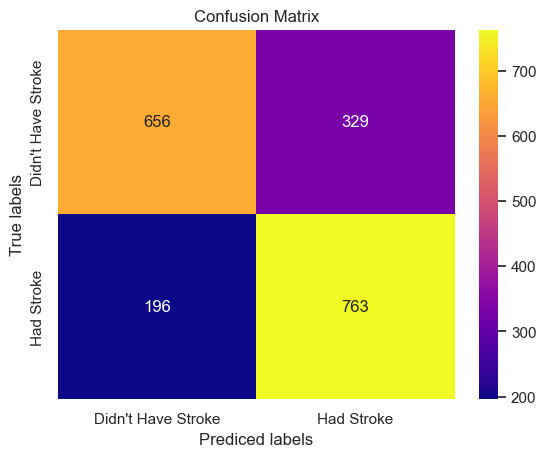

In [140]:
plot_confusion_matrix(y_test, y_pred_lr)

In [141]:
cr = metrics.classification_report(y_test, y_pred_lr)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.67      0.71       985
           1       0.70      0.80      0.74       959

    accuracy                           0.73      1944
   macro avg       0.73      0.73      0.73      1944
weighted avg       0.73      0.73      0.73      1944



<span style="color:blue; font-size:18px; font-weight:bold;">SVC</span>

In [142]:
# Parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}

svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10).fit(X_train, y_train)


print('Tuned hyper parameters : ', svc_cv.best_params_)
print('accuracy : ', svc_cv.best_score_)

Tuned hyper parameters :  {'C': 1000, 'gamma': 1.0}
accuracy :  0.9028560510565651


In [143]:
# Time before running algorithm
t1 = datetime.now()
# Model
svc = SVC(**svc_cv.best_params_).fit(X_train, y_train)
# Calculate time after running algorithm
t2 = datetime.now()

In [144]:
y_pred_svc = svc.predict(X_test)

svc_score = round(svc.score(X_test, y_test), 3)
print('SVC Score : ', svc_score)

SVC Score :  0.917


In [145]:
delta = t2-t1
delta_svc = round(delta.total_seconds(), 3)
print('SVC : ', delta_svc, 'Seconds')

SVC :  12.18 Seconds


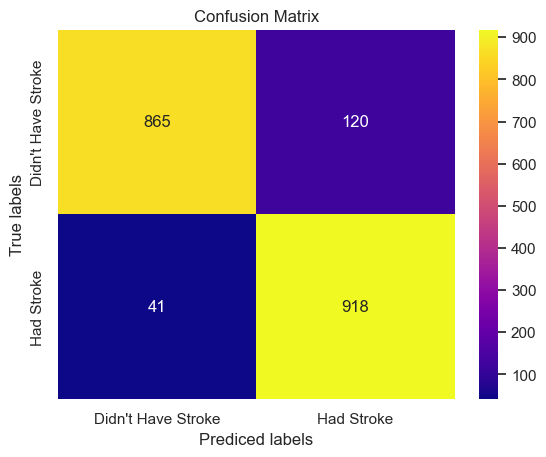

In [146]:
plot_confusion_matrix(y_test, y_pred_svc)

In [147]:
cr = metrics.classification_report(y_test, y_pred_svc)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       985
           1       0.88      0.96      0.92       959

    accuracy                           0.92      1944
   macro avg       0.92      0.92      0.92      1944
weighted avg       0.92      0.92      0.92      1944



<span style="color:blue; font-size:18px; font-weight:bold;">Decision Tree Classifier</span>

In [148]:
# Parameters to test in algorithm
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
        }
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', tree_cv.best_params_)
print('accuracy : ', tree_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'log_loss', 'max_depth': 27, 'splitter': 'best'}
accuracy :  0.8829154714758827


In [149]:
# Time before running algorithm :
t1 = datetime.now()
# Model :
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)
# Calculate time after running algorithm :
t2 = datetime.now()

In [150]:
y_pred_tree = tree.predict(X_test)

tree_score = round(tree.score(X_test, y_test), 3)
print('DecisionTreeClassifier Score : ', tree_score)

DecisionTreeClassifier Score :  0.891


In [151]:
delta = t2-t1
delta_tree = round(delta.total_seconds(), 3)
print('DecisionTreeClassifier takes : ', delta_tree, 'Seconds')

DecisionTreeClassifier takes :  0.24 Seconds


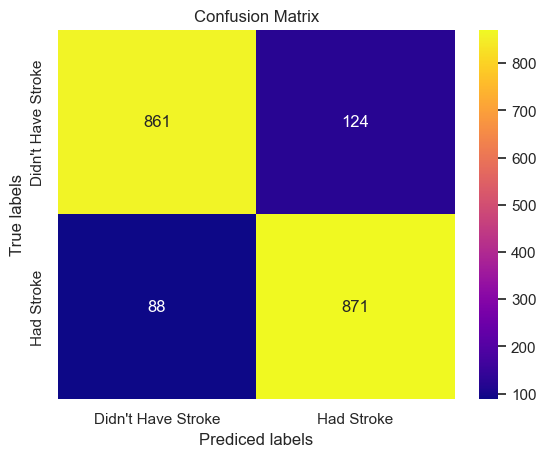

In [152]:
plot_confusion_matrix(y_test, y_pred_tree)

In [153]:
cr = metrics.classification_report(y_test, y_pred_tree)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       985
           1       0.88      0.91      0.89       959

    accuracy                           0.89      1944
   macro avg       0.89      0.89      0.89      1944
weighted avg       0.89      0.89      0.89      1944



<span style="color:blue; font-size:18px; font-weight:bold;">K Neighbors Classifier</span>

In [154]:
# Parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 20, 2)),
    'p' : [1, 2, 3, 4]
}

# Time to run in second
t1 = datetime.now()

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

t2 = datetime.now()

print('Tuned hyper parameters : ', knn_cv.best_params_)
print('accuracy : ', knn_cv.best_score_)

Tuned hyper parameters :  {'n_neighbors': 3, 'p': 2}
accuracy :  0.8926928764975036


In [155]:
# Time before running algorithm :
t1 = datetime.now()
# Model :
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)
# Calculate time after running algorithm :
t2 = datetime.now()

In [156]:
y_pred_knn = knn_cv.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print('KNeighborsClassifier Score :', knn_score)

KNeighborsClassifier Score : 0.899


In [157]:
delta = t2-t1
delta_knn = round(delta.total_seconds(), 3)
print('KNeighborsClassifier takes : ', delta_knn, 'Seconds')

KNeighborsClassifier takes :  0.049 Seconds


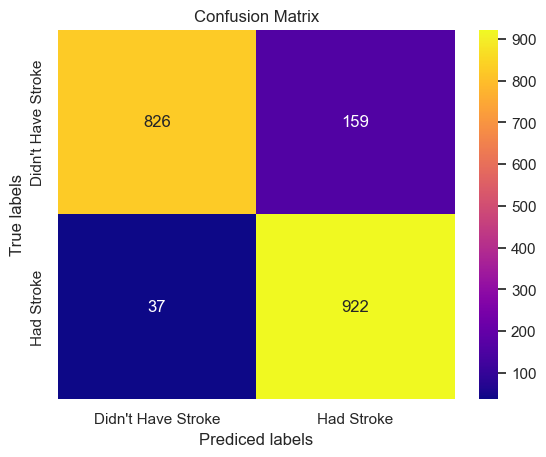

In [158]:
plot_confusion_matrix(y_test, y_pred_knn)

In [159]:
cr = metrics.classification_report(y_test, y_pred_knn)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.84      0.89       985
           1       0.85      0.96      0.90       959

    accuracy                           0.90      1944
   macro avg       0.91      0.90      0.90      1944
weighted avg       0.91      0.90      0.90      1944



<span style="color:blue; font-size:24px; font-weight:bold;">Evaluate Model's Performance </span>

In [160]:
# DataFrame with results
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier'],
    'Score' : [rf_score, lr_score, svc_score, tree_score, knn_score],
    'Delta_t' : [delta_rf, delta_lr, delta_svc, delta_tree, delta_knn]
})

result

,Algorithm,Score,Delta_t
0,RandomForestClassifier,0.924,17.458
1,LogisticRegression,0.730,0.029
2,SVC,0.917,12.180
3,DecisionTreeClassifier,0.891,0.240
4,KNeighborsClassifier,0.899,0.049


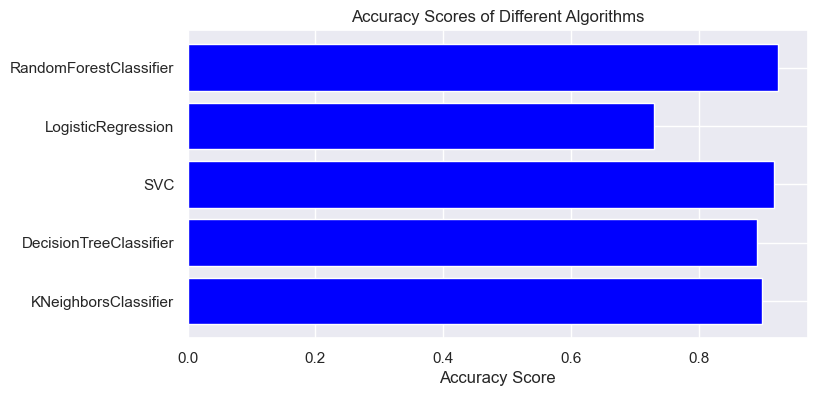

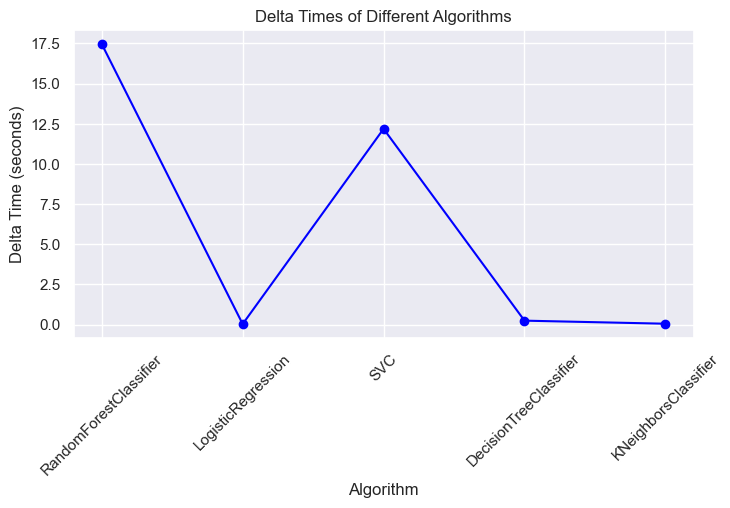

In [161]:
# DataFrame with algorithm names, scores, and delta times
result = pd.DataFrame({
    'Algorithm': ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier'],
    'Score': [rf_score, lr_score, svc_score, tree_score, knn_score],
    'Delta_t': [delta_rf, delta_lr, delta_svc, delta_tree, delta_knn]
})

# Plotting the accuracy scores
plt.figure(figsize=(8, 4))
plt.barh(result['Algorithm'], result['Score'], color='blue')
plt.xlabel('Accuracy Score')
plt.title('Accuracy Scores of Different Algorithms')
plt.gca().invert_yaxis()  # Invert y-axis to display the algorithm names from top to bottom
plt.show()

# Plotting the delta times
plt.figure(figsize=(8, 4))
plt.plot(result['Algorithm'], result['Delta_t'], marker='o', color='blue', linestyle='-')
plt.xlabel('Algorithm')
plt.ylabel('Delta Time (seconds)')
plt.title('Delta Times of Different Algorithms')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()